# Статистическая обработка случайных последовательностей. Идентификация законов распределения.

# 1. Статистическая обработка случайных последовательностей

## 1.1. Считывание выборки

### Исходные данные

In [1]:
import math

with open('input.txt', encoding='utf8') as f:
    content = f.readlines()
    num = int(content[0].split(' = ')[1])
    x = [float(i) for i in content[1].split(' ')]

print(num)

12200


In [2]:
import random

random.shuffle(x)

In [3]:
class Sample:
    
    def __init__(self, values):
        self.values = values
    
    def mean(self):
        return st.tmean(self.values)
    
    def median(self):
        return np.median(self.values)

    def mid(self):
        return (min(self.values) + max(self.values)) / 2
    
    def mode(self):
        return st.mode(self.values)[0][0]
    
    def variance(self):
        return np.var(self.values)
    
    def std(self):
        return np.std(self.values)
    
    def moment(self, k):
        return st.moment(self.values, k)
    
    def skewness(self):
        return st.skew(self.values)
    
    def kurtosis(self):
        return st.kurtosis(self.values)
    
    def percentile(self, q):
        return np.percentile(self.values, q)
    
    def interval_mean(self, q):
        c = self.mean()
        s = self.std()
        n = len(self.values)
        delta = s / math.sqrt(n) * st.t.ppf((1+q)/2, n - 1)
        left = c - delta
        right = c + delta
        return (left, right)
    
    def interval_variance(self, q):
        s = self.std()
        n = len(self.values)
        left = (n - 1) * (s ** 2) / st.chi2.ppf((1+q)/2, n - 1)
        right = (n - 1) * (s ** 2) / st.chi2.ppf((1-q)/2, n - 1)
        return (left, right)   

    def parametric_confidence_interval(self, q, p): # ?
        m = self.mean()
        s = self.std()
        h = s * 1.886
        return (m - h, m + h)
        
    def __str__(self):
        return str(self.values)

In [4]:
samples = [Sample(x)]

samples_num = 10
for i in range(samples_num):
    start = int(i*num/10)
    end = int((i+1)*num/10)
    samples.append(Sample(x[start : end]))

## 1.2. Построение выборочной функции распределения и гистограмм

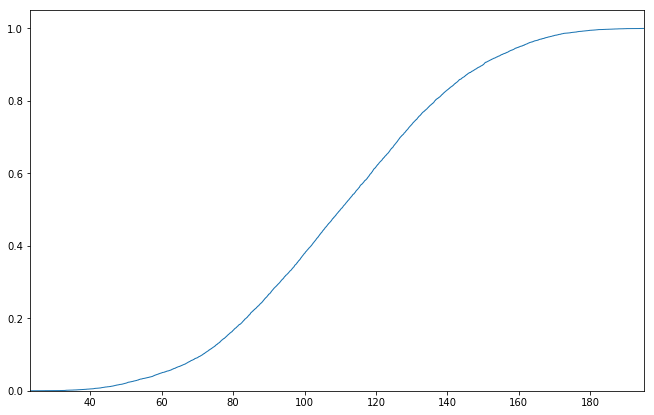

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

plt.figure(figsize=(11, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True)
plt.xlim([min(x), max(x)-1])
plt.show()

Построим абсолютные гистограммы.

[   10.    55.   165.   277.   390.   627.   921.  1110.  1212.  1272.
  1233.  1271.  1102.   892.   648.   454.   330.   150.    63.    18.]


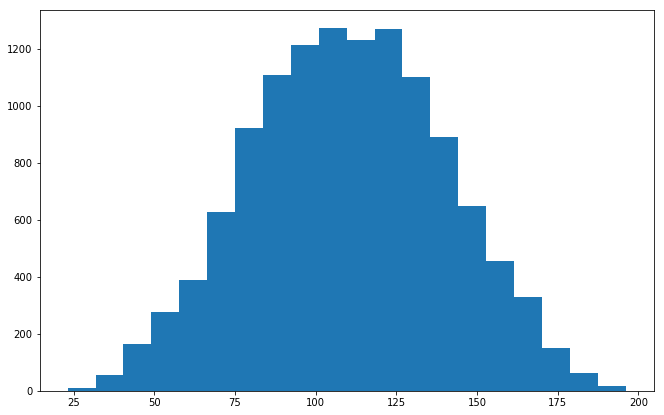

[   8.   23.   20.   27.   49.   76.  106.  116.  107.  136.  127.  114.
   90.   77.   63.   37.   22.    9.   10.    3.]


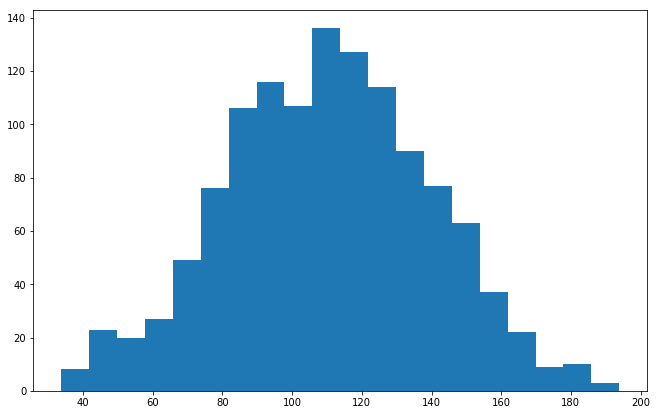

[   3.    8.   10.   25.   50.   71.   80.  108.  121.  132.  127.  137.
  110.   80.   48.   60.   26.   14.    8.    2.]


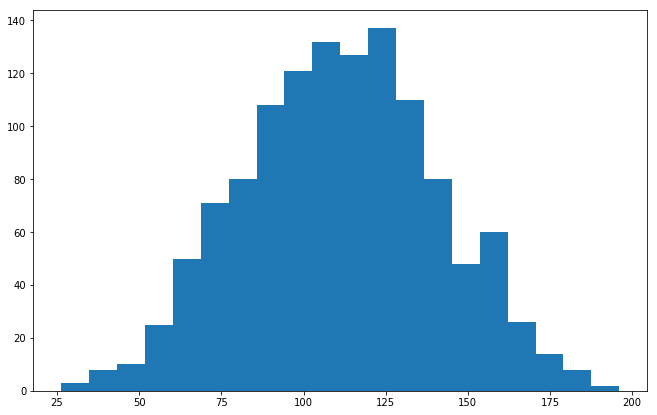

[   2.    8.   22.   27.   38.   73.  104.   86.  140.  121.  115.  112.
  114.   82.   69.   49.   32.   19.    2.    5.]


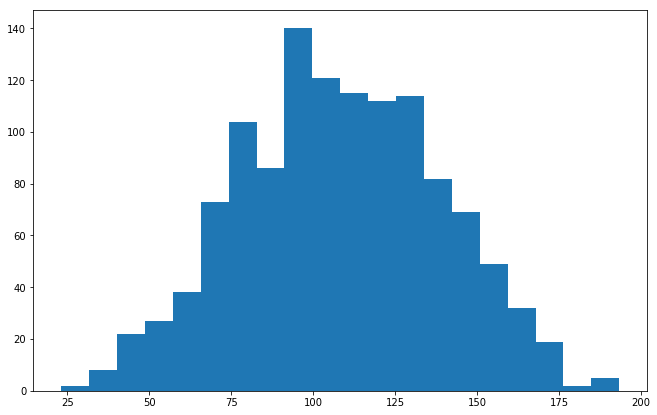

[   4.   15.   28.   42.   47.   80.  102.  102.  121.   98.  118.  103.
  104.   71.   73.   43.   33.   22.   11.    3.]


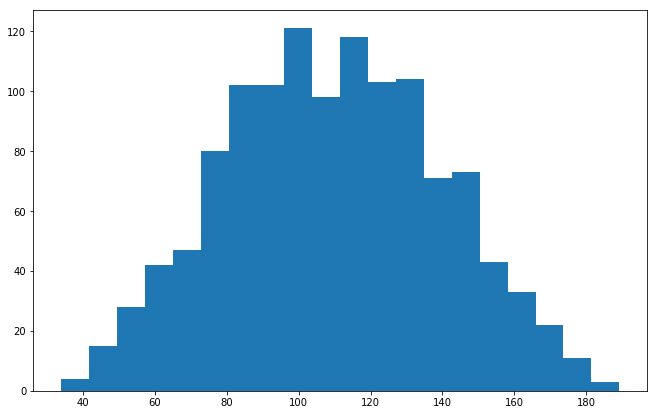

[  10.    9.   18.   34.   47.   89.   77.  104.  117.   98.  107.  120.
   98.   93.   68.   52.   36.   24.   12.    7.]


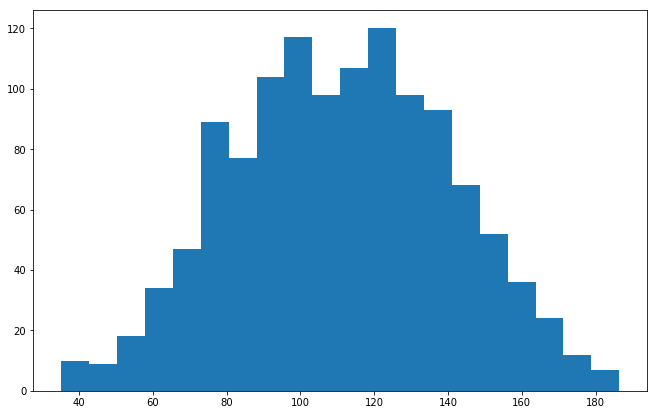

[   6.   16.   28.   29.   44.   75.   76.  102.  112.  118.  114.  101.
   97.  100.   65.   44.   47.   30.   13.    3.]


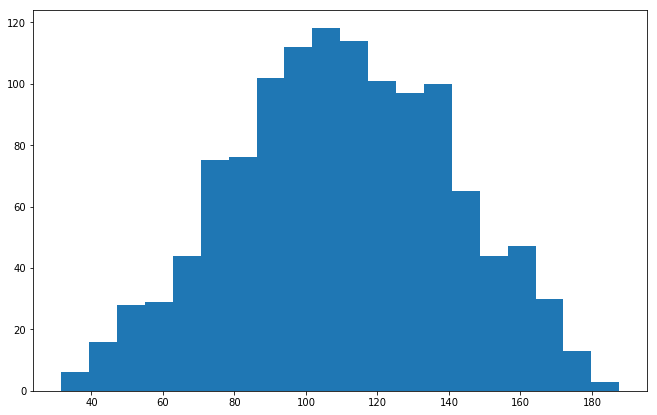

[   4.    5.   26.   24.   49.   63.  104.  109.  102.  122.  131.  132.
  107.   76.   66.   49.   25.   15.    7.    4.]


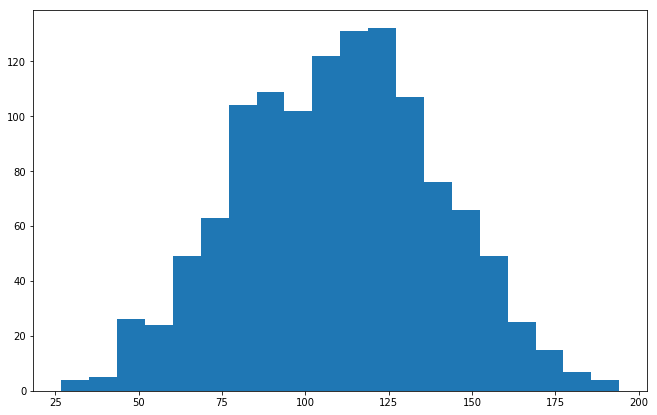

[  12.   11.   29.   32.   50.   85.   95.   99.  124.  109.  124.  105.
   80.   94.   59.   47.   38.   17.    8.    2.]


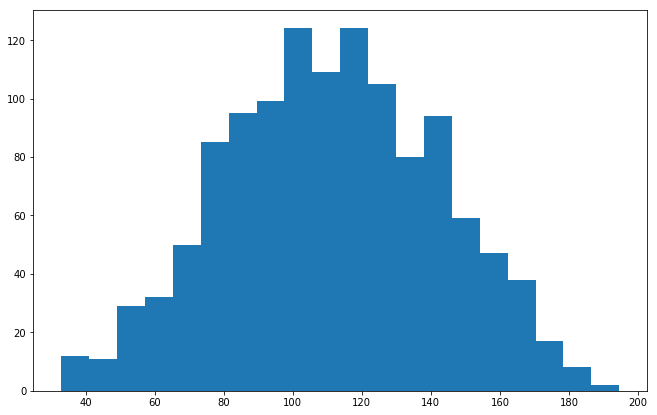

[   4.    4.   23.   33.   37.   65.   93.  102.  109.  124.  118.  117.
  117.   87.   71.   39.   33.   27.   14.    3.]


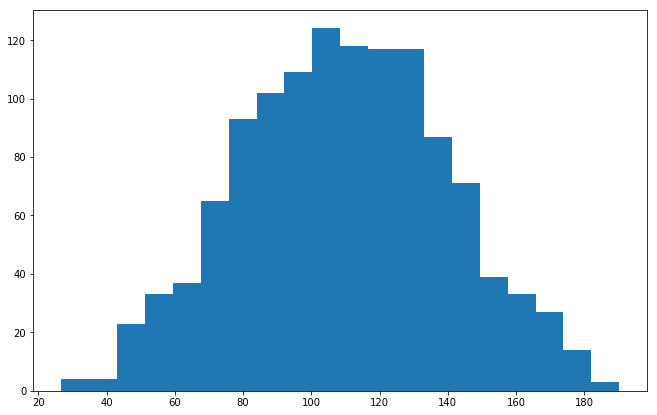

[  11.   17.   36.   33.   34.   80.  107.  111.  101.  100.  119.   97.
  115.   80.   69.   42.   27.   26.   11.    4.]


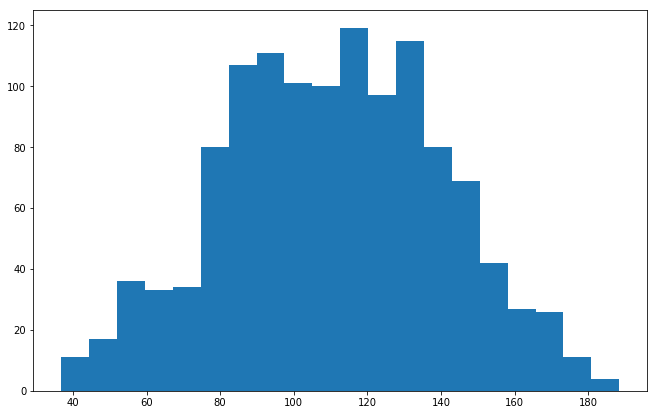

In [6]:
num_bins = 20

for s in samples:
    plt.figure(figsize=(11, 7))
    (n, bins, patches) = plt.hist(s.values, num_bins)
    print(n)
    plt.show()

Построим относительные гистограммы.

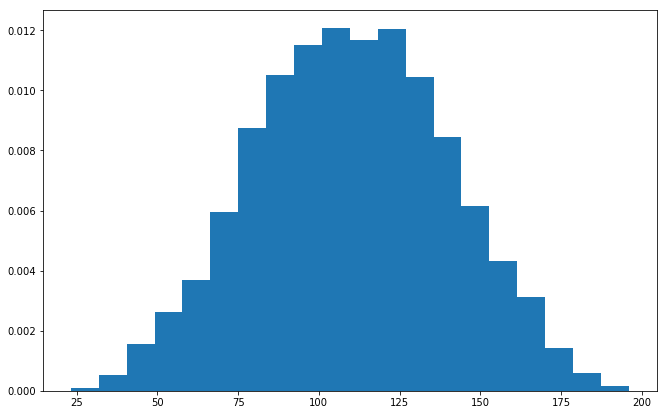

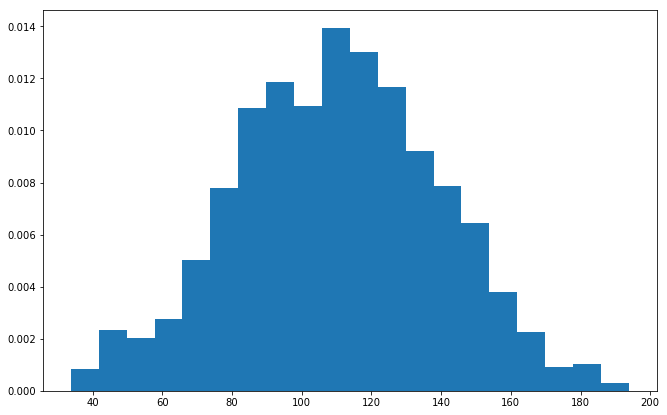

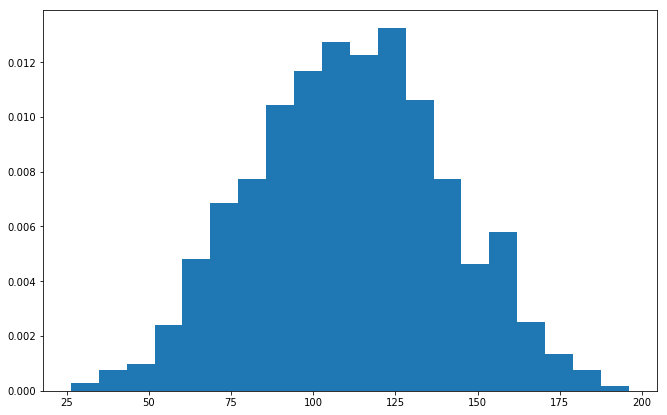

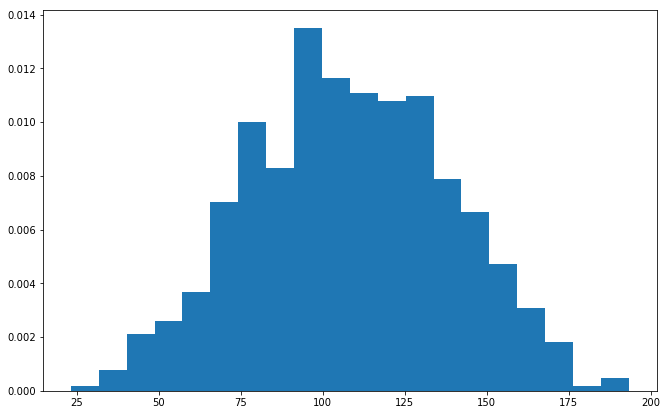

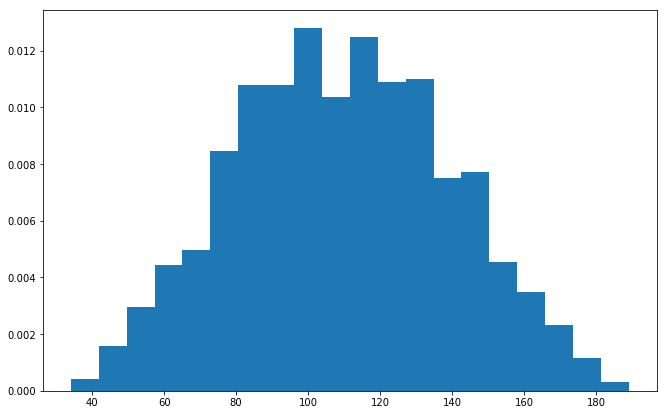

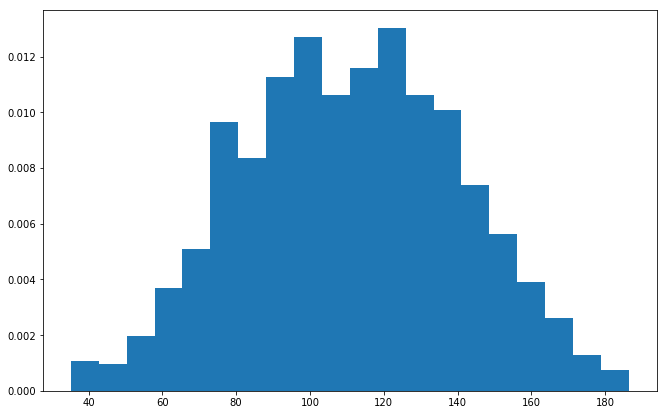

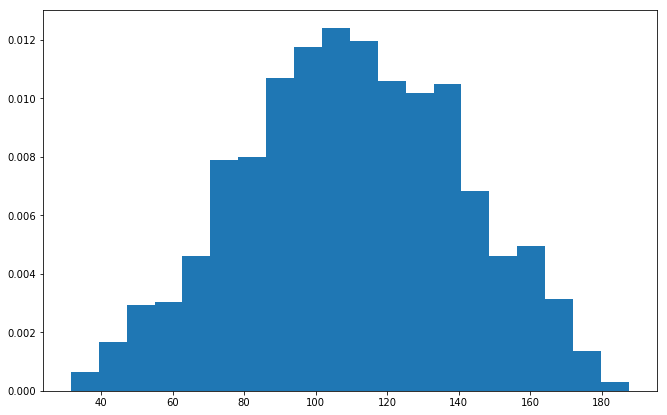

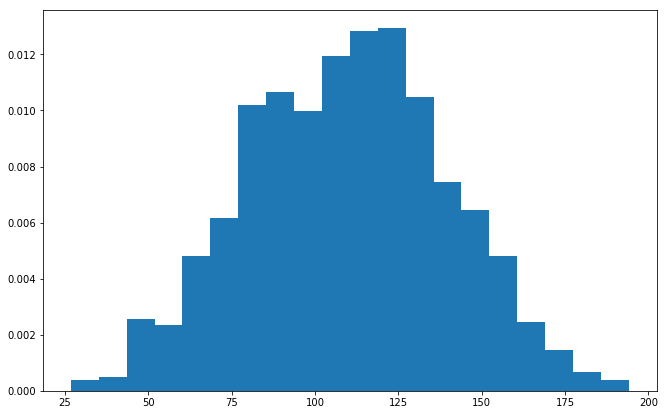

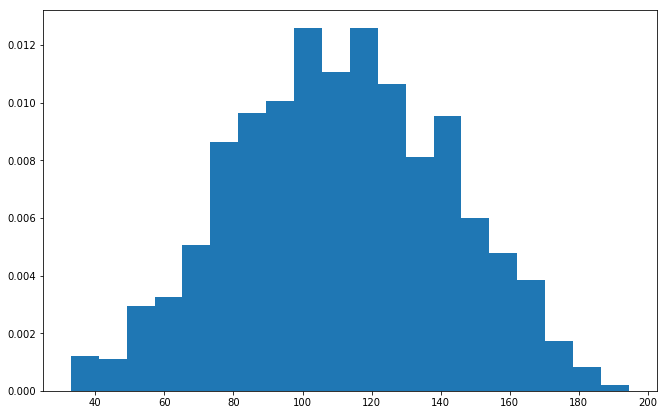

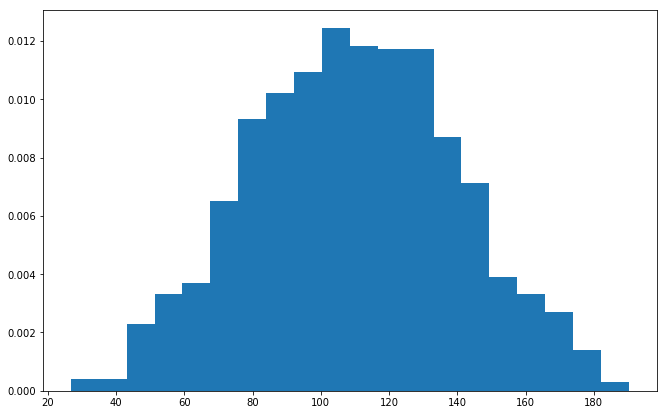

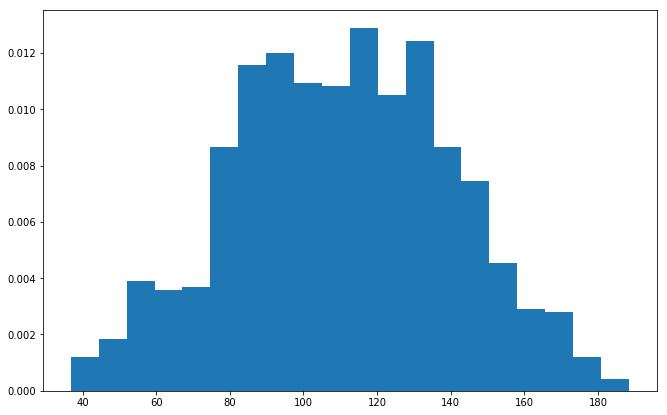

In [7]:
num_bins = 20

for s in samples:
    plt.figure(figsize=(11, 7))
    (n, bins, patches) = plt.hist(s.values, num_bins, normed=True)
    plt.show()

## 1.3. Определение точечных оценок

Составим таблицу характеристик для всей выборки (подвыборка $0$) и для каждой подвыборки (подвыборки $1-10$).

In [8]:
import pandas as pd
import scipy.stats as st

d = {}

for i in range(len(samples)):
    s = samples[i]
    stat = {}
    stat[r'$\bar{x}$'] = s.mean()
    stat[r'$x_{med}$'] = s.median()
    stat[r'$x_{mid}$'] = s.mid()
    stat[r'$x_{mode}$'] = s.mode()
    stat[r'$s^2$'] = s.variance()
    stat[r'$s$'] = s.std()
    stat[r'$\hat{m}_3$'] = s.moment(3)
    stat[r'$\hat{m}_4$'] = s.moment(4)
    stat[r'$As$'] = s.skewness()
    stat[r'$Ex$'] = s.kurtosis()
    d[i] = pd.Series(stat)

In [9]:
keys = [r'$\bar{x}$', r'$x_{med}$', r'$x_{mid}$', r'$x_{mode}$', r'$s^2$', r'$s$',
        r'$\hat{m}_3$', r'$\hat{m}_4$', r'$As$', r'$Ex$']

df = pd.DataFrame(d, index=keys).transpose()
# df.columns = ['x_avg', 'x_med', 'x_mid', 'x_mode', 's^2', 's', 'm_3', 'm_4', 'As', 'Ex']
# df.to_csv('table.csv')
df

,$\bar{x}$,$x_{med}$,$x_{mid}$,$x_{mode}$,$s^2$,$s$,$\hat{m}_3$,$\hat{m}_4$,$As$,$Ex$
0,110.146511,110.0465,109.59490,101.097,902.224343,30.037050,89.286287,2.078277e+06,0.003295,-0.446862
1,110.077998,109.4915,113.79750,116.661,854.216619,29.226984,-75.441150,1.991090e+06,-0.003022,-0.271305
2,111.168426,111.2695,111.16535,100.627,863.346785,29.382763,803.020273,1.982920e+06,0.031655,-0.339676
3,108.119015,107.5005,108.26740,114.289,935.061703,30.578779,450.489620,2.186502e+06,0.015755,-0.499255
4,109.487212,109.4270,111.58200,103.515,900.122685,30.002045,1231.588756,1.970895e+06,0.045605,-0.567460
5,110.978666,111.3305,110.80545,107.523,863.710309,29.388949,275.623696,1.873989e+06,0.010858,-0.487935
6,110.141828,109.7705,109.58480,120.456,943.269381,30.712691,-571.770470,2.210590e+06,-0.019736,-0.515513
7,109.926123,110.6850,110.44620,102.760,898.123279,29.968705,-197.033244,2.099252e+06,-0.007320,-0.397488
8,111.225766,110.5195,113.71770,107.368,956.393727,30.925616,-431.111722,2.307189e+06,-0.014576,-0.477624
9,109.698072,109.4300,108.47555,103.558,914.476982,30.240320,117.742249,2.151191e+06,0.004258,-0.427630


Каждую характеристику изобразим на графиках. Красной точкой отмечена характеристика всей выборки, а синими - характеристики каждой из подвыборок.

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


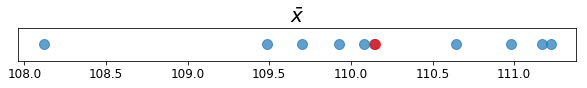

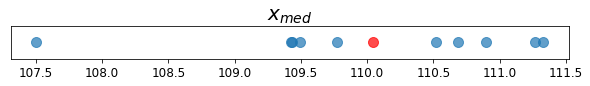

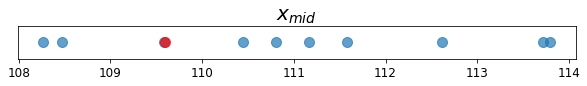

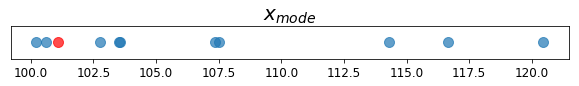

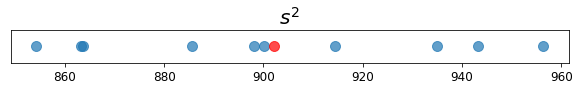

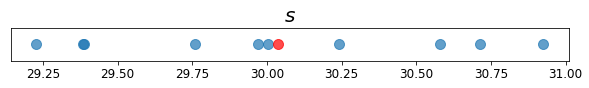

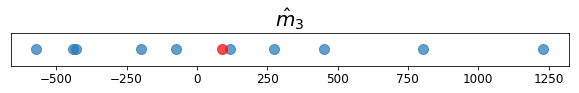

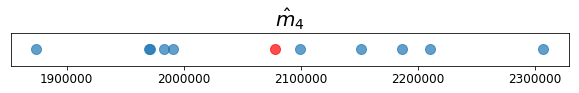

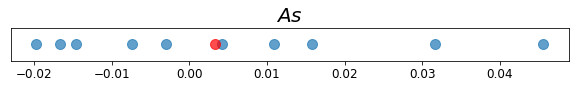

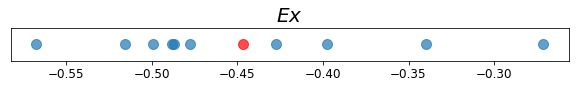

In [10]:
from matplotlib import rc

font = {'family': 'Arial', 'weight': 'normal'}
rc('font', **font)

size = len(d) - 1

for i in range(len(keys)):
    key = keys[i]
    y = np.zeros(size)
    plt.figure(figsize=(10, 0.6))
    plt.title(key, fontsize=20)
    plt.plot([d[i][key] for i in range(1, size + 1)], y, marker='o', linestyle='None', alpha=0.7, markersize=10)
    plt.plot(d[0][key], 0, marker='o', color='r', alpha=0.7, markersize=10)
    plt.yticks([])
    plt.xticks(fontsize=12)
    plt.show()

In [11]:
print(samples[0].percentile(2.5), end=' -- ')
print(samples[0].percentile(97.5))

51.46851 -- 167.7943


Получили границы интерквантильного промежутка для $P = 0.95$:
$$J_{0.95} \approx [51, 168]$$

## 1.4. Определение интервальных оценок

Будем определять интервальные оценки с доверительной вероятностью $Q = 0.8$.

In [12]:
q = 0.8

### Математическое ожидание

Найдем интервальные оценки математического ожидания для всей выборки (первая строка) и для каждой подвыборки. Изобразим оценки на одном графике.

In [13]:
for sample in samples:
    print(sample.interval_mean(q))

(109.79798341004171, 110.49503826208947)
(109.00505739439386, 111.15093817937661)
(110.08976685022193, 112.24708511699117)
(106.99644933752511, 109.24158049854044)
(108.38581888742596, 110.58860553880351)
(109.89977970052118, 112.05755210275757)
(109.01434653447313, 111.26930969503508)
(108.82595362712397, 111.02629243844981)
(110.09046770903252, 112.3610640942462)
(108.5879313102931, 110.80821246019872)
(109.54954580838019, 111.73445943752144)


/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


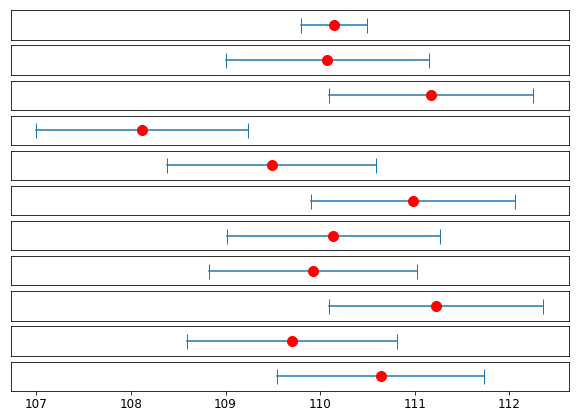

In [14]:
fig = plt.figure(figsize=(10, 7))
size = len(samples)

for i in range(size):
    s = samples[i]
    if i > 0:
        ax = fig.add_subplot(size, 1, i+1, sharex=ax_prev)
    else:
        ax = fig.add_subplot(size, 1, i+1)
    xes, y = list(s.interval_mean(0.8)), [0, 0]
    ax.plot(xes, y, marker = '|', markersize=15)
    ax.plot(s.mean(), 0, color='red', marker = 'o', markersize=10)
    plt.yticks([])
    if (i != size - 1):
        ax.get_xaxis().set_visible(False)
    plt.xticks(fontsize=12)
    ax_prev = ax

plt.show()

### Дисперсия

Найдем интервальные оценки дисперсии для всей выборки (первая строка) и для каждой подвыборки. Изобразим оценки на одном графике.

In [15]:
for sample in samples:
    print(sample.interval_variance(q))

(887.6282171287985, 917.24305488751872)
(811.80129204832031, 900.64088287989648)
(820.47810843661557, 910.26724791415654)
(888.63208859774204, 985.87966866950842)
(855.4279346980021, 949.04181342529466)
(820.82358127068358, 910.65052761737172)
(896.43222186525657, 994.53341063992275)
(853.52780759279665, 946.93374563779673)
(908.90489119552376, 1008.3710283272967)
(869.0694825624339, 964.17622603687118)
(841.60266838819916, 933.70357711392717)


/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


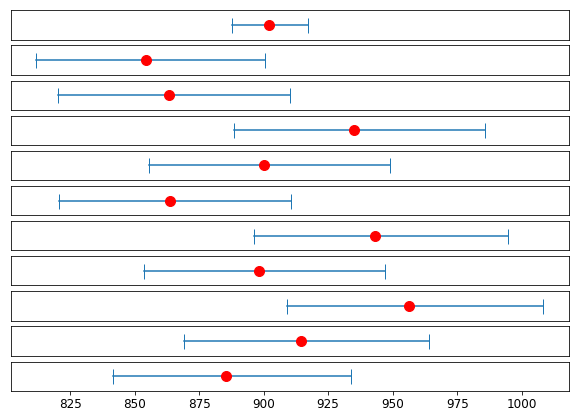

In [16]:
fig = plt.figure(figsize=(10, 7))
size = len(samples)

for i in range(size):
    s = samples[i]
    if i > 0:
        ax = fig.add_subplot(size, 1, i+1, sharex = ax_prev)
    else:
        ax = fig.add_subplot(size, 1, i+1)
    xes, y = list(s.interval_variance(0.8)), [0, 0]
    ax.plot(xes, y, marker = '|', markersize=15)
    ax.plot(s.variance(), 0, color='red', marker = 'o', markersize=10)
    plt.yticks([])
    if (i != size - 1):
        ax.get_xaxis().set_visible(False)
    plt.xticks(fontsize=12)
    ax_prev = ax

plt.show()

### Толерантные пределы

In [17]:
p = 0.95

In [18]:
for sample in samples:
    print(sample.parametric_confidence_interval(q, p))

(53.496635457991722, 166.79638621413946)
(54.955905142438461, 165.200090431332)
(55.752534198468446, 166.58431776874465)
(50.447438415512103, 165.79059142055345)
(52.903355960280145, 166.07106846594931)
(55.551108558251805, 166.40622324502695)
(52.217693131966932, 168.06596309754127)
(53.405145420299817, 166.44710064527396)
(52.90005406350398, 169.55147773977475)
(52.66482749520344, 166.73131627528838)
(54.517257796268034, 166.76674744963358)


# 2. Идентификация закона и параметров распределения

## 2.1. Начальный выбор распределения

Основываясь на виде выборочной функции распределения и гистограммы остановим выбор на трех распределениях:
* Нормальное
* Логнормальное
* Гамма (Эрланга)

<img src="dist_info.png" width=1000px>

## 2.2. Определение параметров теоретических распределений

### Нормальное распределение

#### Метод моментов

Для нормального распределения оценим параметры $\mu$ и $\sigma$ следующим образом:
$$ \mu = M[x] $$
$$ \sigma = \sqrt{D[x]} $$


In [19]:
s = samples[0]

norm_mu_mm = s.mean()
norm_sigma_mm = math.sqrt(s.variance())

$$ \mu = 110.15 $$
$$ \sigma = 30.04 $$

#### Метод максимального праводоподобия

In [20]:
loc, scale = st.norm.fit(x)

norm_mu_mle = loc
norm_sigma_mle = scale

$$ \mu = 110.15 $$
$$ \sigma = 30.04 $$

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


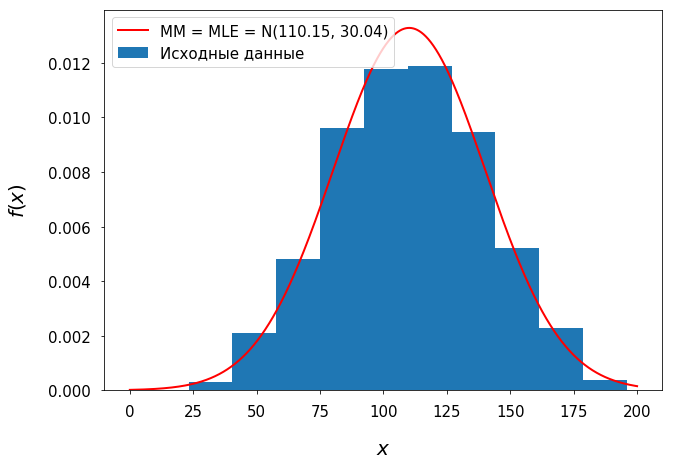

In [21]:
xes = np.linspace(0, 200, num)
norm_pdf = st.norm.pdf(xes, loc=norm_mu_mle, scale=norm_sigma_mle)

plt.figure(figsize=(10, 7))
plt.hist(s.values, normed=True, label='Исходные данные')
plt.plot(xes, norm_pdf, label='MM = MLE = N({0:.2f}, {1:.2f})'.format(norm_mu_mle, norm_sigma_mle), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$f(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_norm.png')
plt.show()

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


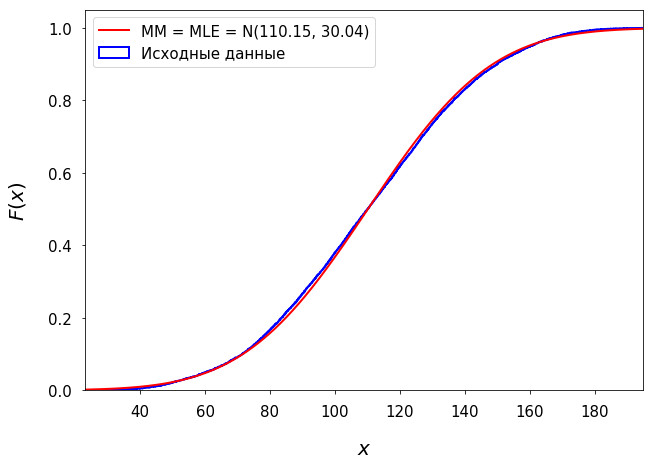

In [22]:
norm_cdf = st.norm.cdf(xes, loc=norm_mu_mle, scale=norm_sigma_mle)

plt.figure(figsize=(10, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True, label='Исходные данные', color='b', linewidth=2)
plt.plot(xes, norm_cdf, label='MM = MLE = N({0:.2f}, {1:.2f})'.format(norm_mu_mle, norm_sigma_mle), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlim([min(x), max(x)-1])
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$F(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_cum_norm.png')
plt.show()

Оценки, полученные с помощью метода моментов и метода максимального правдоподобия, совпали.

### Логнормальное распределение

#### Метод моментов

Для логнормального распределения оценим параметры $\mu$ и $\sigma$ следующим образом:
$$ \mu = \log{\frac{M[x]}{\sqrt{1 + \frac{D[x]}{M[x]^2}}}} $$
$$ \sigma = \sqrt{\log{1 + \frac{D[x]}{M[x]^2}}} $$


In [23]:
logn_mu_mm = math.log(s.mean()/math.sqrt(1 + s.variance()/(s.mean()**2)))
logn_sigma_mm = math.sqrt(math.log(1 + s.variance() / (s.mean() ** 2)))

$$ \mu = 4.67 $$
$$ \sigma = 0.27 $$

#### Метод максимального правдоподобия

In [24]:
shape, loc, scale = st.lognorm.fit(x)

logn_mu_mle = math.log(scale)
logn_loc_mle = loc
logn_sigma_mle = shape

$$ \mu = 7.09 $$
$$ \sigma = 0.02 $$

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


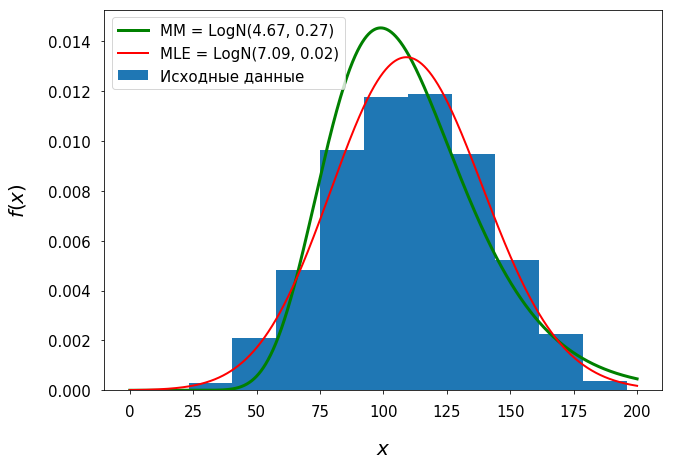

In [25]:
logn_pdf_mle = st.lognorm.pdf(xes, logn_sigma_mle, loc=loc, scale=math.exp(logn_mu_mle))
logn_pdf_mm = st.lognorm.pdf(xes, logn_sigma_mm, scale=math.exp(logn_mu_mm))

plt.figure(figsize=(10, 7))
plt.hist(s.values, normed=True, label='Исходные данные')
plt.plot(xes, logn_pdf_mm, label='MM = LogN({0:.2f}, {1:.2f})'.format(logn_mu_mm, logn_sigma_mm), color='g', linewidth=3)
plt.plot(xes, logn_pdf_mle, label='MLE = LogN({0:.2f}, {1:.2f})'.format(logn_mu_mle, logn_sigma_mle), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$f(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_lognorm.png')
plt.show()

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


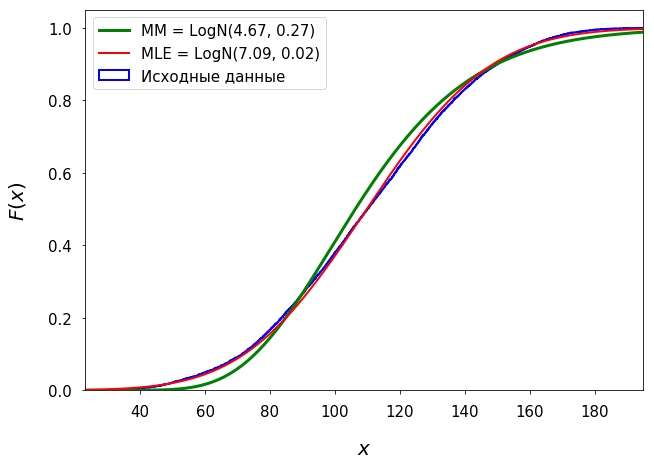

In [26]:
logn_cdf_mm = st.lognorm.cdf(xes, logn_sigma_mm, scale=math.exp(logn_mu_mm))
logn_cdf_mle = st.lognorm.cdf(xes, logn_sigma_mle, loc=loc, scale=math.exp(logn_mu_mle))

plt.figure(figsize=(10, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True, label='Исходные данные', color='b', linewidth=2)
plt.plot(xes, logn_cdf_mm, label='MM = LogN({0:.2f}, {1:.2f})'.format(logn_mu_mm, logn_sigma_mm), color='g', linewidth=3)
plt.plot(xes, logn_cdf_mle, label='MLE = LogN({0:.2f}, {1:.2f})'.format(logn_mu_mle, logn_sigma_mle), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlim([min(x), max(x)-1])
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$F(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_cum_lognorm.png')
plt.show()

### Гамма-распределение

#### Метод моментов

Найдем параметры $k$ и $\theta$ из системы уравнений:
$$ k \cdot \theta = M[x] $$
$$ k \cdot \theta^2 = D[x] $$



In [27]:
gamma_k_mm = 13.44
gamma_theta_mm = 8.18

$$ k \approx 13.44 $$
$$ \theta \approx 8.18 $$


#### Метод максимального правдоподобия

In [28]:
shape, loc, scale = st.gamma.fit(x)

gamma_k_mle = (shape*scale+loc)*scale*2.4
gamma_theta_mle = s.mean() / gamma_k_mle

$$ k \approx 13.09 $$
$$ \theta \approx 8.42 $$


/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


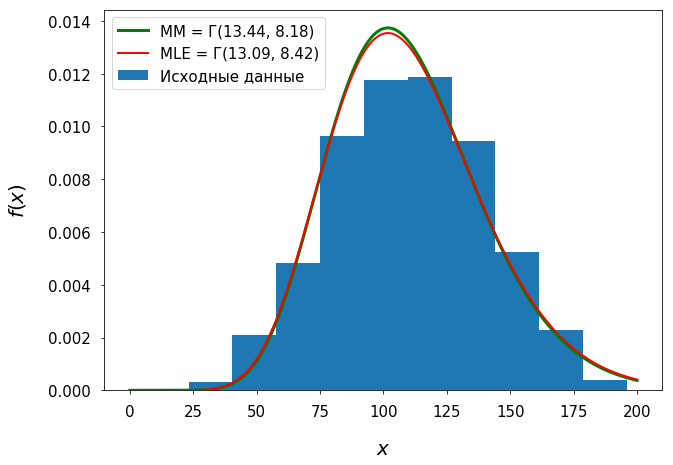

In [29]:
gamma_pdf_mm = st.gamma.pdf(xes, gamma_k_mm, scale=gamma_theta_mm)
gamma_pdf_mle = st.gamma.pdf(xes, gamma_k_mle, scale=gamma_theta_mle)

plt.figure(figsize=(10, 7))
plt.hist(s.values, normed=True, label='Исходные данные')
plt.plot(xes, gamma_pdf_mm, label='MM = Г({0:.2f}, {1:.2f})'.format(gamma_k_mm, gamma_theta_mm), color='g', linewidth=3)
plt.plot(xes, gamma_pdf_mle, label='MLE = Г({0:.2f}, {1:.2f})'.format(gamma_k_mle, gamma_theta_mle), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$f(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_gamma`.png')
plt.show()

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


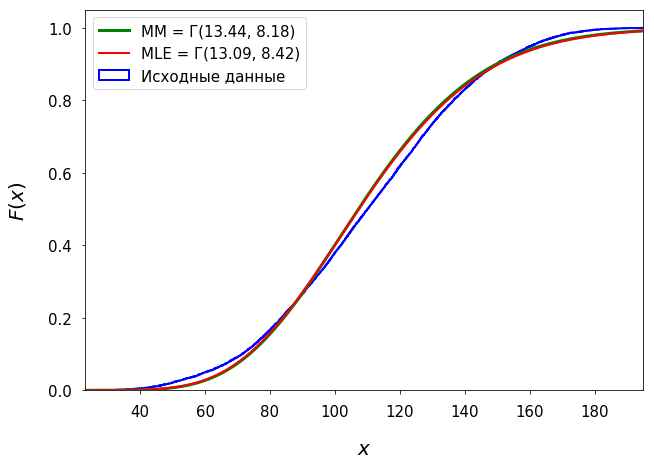

In [30]:
gamma_cdf_mm = st.gamma.cdf(xes, gamma_k_mm, scale=gamma_theta_mm)
gamma_cdf_mle = st.gamma.cdf(xes, gamma_k_mle, scale=gamma_theta_mle)

plt.figure(figsize=(10, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True, label='Исходные данные', color='b', linewidth=2)
plt.plot(xes, gamma_cdf_mm, label='MM = Г({0:.2f}, {1:.2f})'.format(gamma_k_mm, gamma_theta_mm), color='g', linewidth=3)
plt.plot(xes, gamma_cdf_mle, label='MLE = Г({0:.2f}, {1:.2f})'.format(gamma_k_mle, gamma_theta_mle), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlim([min(x), max(x)-1])
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$F(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_cum_gamma.png')
plt.show()

## 2.3. Проверка статистических гипотез

Проверим гипотезы по следующим критериям: "хи-квадрат", Колмагорова-Смирнова и "омега-квадрат" Мизеса.

In [31]:
from scipy.stats import kstest

def chi2test(rvc, cdf, args=()):
    values, edges = np.histogram(rvc, bins='auto')
    n = np.sum(values)
    exp_values = np.array([cdf(edges[i + 1], *args) - cdf(edges[i], *args) for i in range(len(edges) - 1)])
    statistic = np.sum(np.square(values - n * exp_values) / (n * exp_values * (1 - exp_values)))
    return statistic, len(values)


def omega2test(rvc, cdf, args=()):
    n = len(rvc)
    sorted_rvc = np.sort(rvc)
    statistic = [cdf(sorted_rvc[i], *args) - ((i - 0.5) / n) for i in range(1, len(rvc))]
    statistic = np.square(statistic)
    statistic = np.sum(statistic) + 1 / (12 * n)
    return statistic

Рассчитаем критические значения при уровне значимости $\alpha = 0.05$:

In [32]:
alpha = 0.05

In [33]:
chi2_crit = st.chi2.ppf(1 - alpha, num/10)
print('chi2_crit = {}'.format(chi2_crit))

chi2_crit = 1302.370816450486


In [34]:
ks_crit = np.sqrt(-np.log(0.5 * alpha)/(num)) - 1/(6 * num)
print('ks_crit = {}'.format(ks_crit))

ks_crit = 0.01737504686857078


In [35]:
mises_crit = 0.4614
print('mises_crit = {}'.format(mises_crit))

mises_crit = 0.4614


### Нормальное распределение

In [36]:
chi2test(s.values, st.norm.cdf, (norm_mu_mm, norm_sigma_mm))

(134.94626640491114, 47)

In [37]:
kstest(s.values, st.norm.cdf, (norm_mu_mm, norm_sigma_mm))

KstestResult(statistic=0.016458823362101527, pvalue=0.0026942409550408794)

In [38]:
omega2test(s.values, st.norm.cdf, (norm_mu_mm, norm_sigma_mm))

1.0463387337559202

### Логнормальное распределение

#### Метод моментов

In [39]:
chi2test(s.values, st.lognorm.cdf, (logn_mu_mm, math.exp(logn_sigma_mm)))

(214032.88563318996, 47)

In [40]:
kstest(s.values, st.lognorm.cdf, (logn_mu_mm, math.exp(logn_sigma_mm)))

KstestResult(statistic=0.77998047084357236, pvalue=0.0)

In [41]:
omega2test(s.values, st.lognorm.cdf, (logn_mu_mm, math.exp(logn_sigma_mm)))

2320.9140813422009

#### Метод максимального правдоподобия

In [42]:
chi2test(s.values, st.lognorm.cdf, (logn_mu_mle, logn_loc_mle, math.exp(logn_sigma_mle)))

(3902277.1464217473, 47)

In [43]:
kstest(s.values, st.lognorm.cdf, (logn_mu_mle, logn_loc_mle, math.exp(logn_sigma_mle)))

KstestResult(statistic=0.8379432602062995, pvalue=0.0)

In [44]:
omega2test(s.values, st.lognorm.cdf, (logn_mu_mle, logn_loc_mle, math.exp(logn_sigma_mle)))

2425.1474974841854

### Гамма распределение

#### Метод моментов

In [45]:
chi2test(s.values, st.lognorm.cdf, (gamma_k_mm, gamma_theta_mm))

(383157.88081084646, 47)

In [46]:
kstest(s.values, st.lognorm.cdf, (gamma_k_mm, gamma_theta_mm))

KstestResult(statistic=0.59666760275912623, pvalue=0.0)

In [47]:
omega2test(s.values, st.lognorm.cdf, (gamma_k_mm, gamma_theta_mm))

1171.8982857000703

#### Метод максимального правдоподобия

In [48]:
chi2test(s.values, st.lognorm.cdf, (gamma_k_mle, gamma_theta_mle))

(372824.75660402456, 47)

In [49]:
kstest(s.values, st.lognorm.cdf, (gamma_k_mle, gamma_theta_mle))

KstestResult(statistic=0.59914694863002516, pvalue=0.0)

In [50]:
omega2test(s.values, st.lognorm.cdf, (gamma_k_mle, gamma_theta_mle))

1181.4415176858499

### Вывод

Таким образом, из результатов видно, что принять мы можем только гипотезу о том, что исходная выборка подчиняется нормальному распределению $N(\mu, \sigma)$ с параметрами:
$$ \mu = 110.15 $$
$$ \sigma = 30.04 $$

Остальные гипотезы мы должны отвергнуть.